# Assignment
Implement the Adaline with SGD which can set different batch_size ( M ) as parameter. Then, use the Iris dataset to fit your model with 3 different  M  (including  M=1 ) and fixed learning rate  η  and print out the accuracy of each model. Last, plot the cost against the number of epochs using different  M  in one figure.

In [79]:
import pandas as pd
import numpy as np
seed = np.random.seed
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from IPython.display import display

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']
display(df.head())

X = df[['Petal length', 'Petal width']].values
y = pd.factorize(df['Class label'])[0]

# discard exmaples in the first class
X = X[50:150]
y = np.where(y[50:150] == 2, -1, y[50:150])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels: %s' % np.unique(y))

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Training data points: 80
#Testing data points: 20
Class labels: [-1  1]


In [113]:
class AdalineSGD(object):
    def __init__(self, batch_size, eta=0.01, n_iter=50, shuffle=True, random_state=1):
        self.M = batch_size
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state : seed(random_state)
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for j in range(len(X) // self.M):
                cost.append(self._update_weights(X[self.M * j: self.M * (j + 1)], y[self.M * j: self.M*(j + 1)]))
            avg_cost = sum(sum(cost)) / len(y)
            self.cost_.append(avg_cost)
        return self

    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.w_ = np.random.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, yi):
        zi = np.hstack((np.ones((xi.shape[0], 1)),xi))
        output = self.activation(zi)
        
        # Cost function
        error = (yi - output)
        cost = 0.5 * error**2

        # Update rule
        self.w_ += self.eta * zi.T.dot(error)
        
        return cost
    
    def net_input(self, X):
        return X.dot(self.w_)

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        Z = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.where(self.activation(Z) >= 0.0, 1, -1)

In [114]:
# Hyper-parameters
M = [1, 20, 80]
eta = 0.01

cost = []

# Fit the model with different M
for i in range(3):
    adas = AdalineSGD(batch_size=M[i], eta=eta, n_iter=20)
    adas.fit(X_train_std, y_train)
    cost.append(adas.cost_)

    # Testing
    y_pred = adas.predict( X_test_std)
    # print('Misclassified samples: %d' % (y_test != y_pred).sum())
    print(f'M: {M[i]:2d}, Accuracy: {accuracy_score(y_test, y_pred):.2f}')

M:  1, Accuracy: 0.85
M: 20, Accuracy: 0.85
M: 80, Accuracy: 0.85


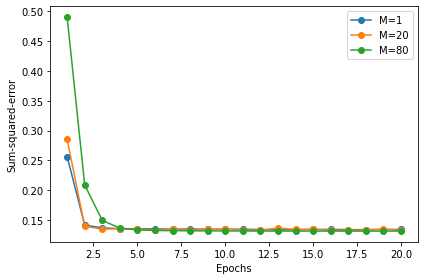

In [116]:
# Plot the cost with different M
for i in range(3):
    plt.plot(range(1, len(cost[i]) + 1), cost[i],
                marker='o', label=f'M={M[i]}')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig('./Lab04-1_110065512.png', dpi=300)
plt.show()